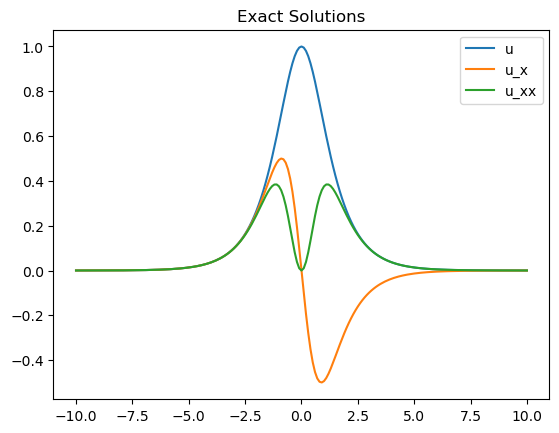

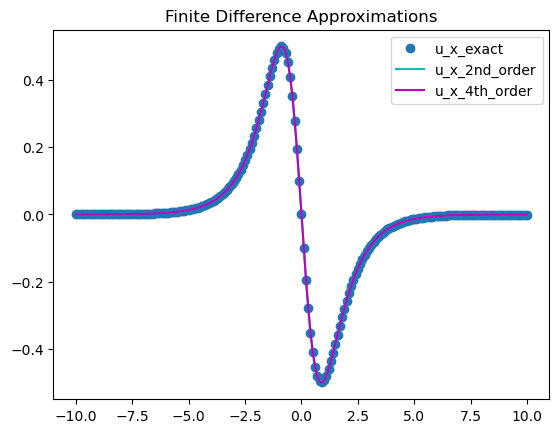

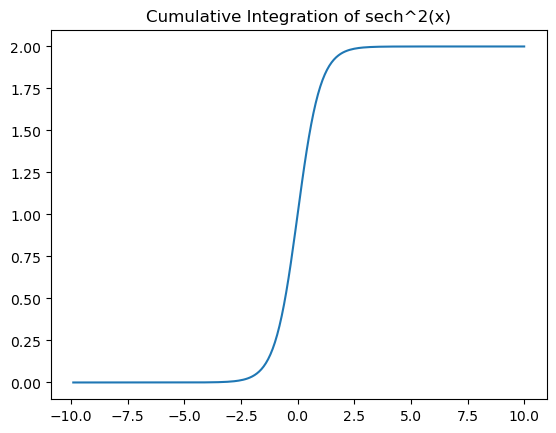

Trapz integration of sech^2(x): 1.9999999917279219
Quad integration of A*sech^2(x): 1.9999999917553857
Dblquad integration of cos(x)*sech(x)*sech(y) + 1.5: 153.84750262731376


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz, cumtrapz, quad, dblquad
from scipy import integrate 

# Clear variables, close figures, and clear console
plt.close('all')
plt.clf()
plt.cla()

# Spatial discretization
dx = 0.1
x = np.arange(-10, 10 + dx, dx)

# Initial function and its derivatives

def sech(x):
    y=1/np.cosh(x)
    return y

def tanh(x):
    y=np.sinh(x)/np.cosh(x)
    return y

u = sech(x)
ux_exact = -sech(x) * tanh(x)
uxx_exact = sech(x) - sech(x)**3

# Plotting exact solutions
plt.figure(1)
plt.plot(x, u, label='u')
plt.plot(x, ux_exact, label='u_x')
plt.plot(x, uxx_exact, label='u_xx')
plt.legend()
plt.title('Exact Solutions')
plt.show()

# Length of spatial domain
n = len(x)

# 2nd-order accurate finite difference
ux = np.zeros_like(x)
ux[0] = (-3 * u[0] + 4 * u[1] - u[2]) / (2 * dx)
ux[1:n-1] = (u[2:] - u[:n-2]) / (2 * dx)
ux[n-1] = (3 * u[n-1] - 4 * u[n-2] + u[n-3]) / (2 * dx)

# 4th-order accurate finite difference
ux2 = np.zeros_like(x)
ux2[:3] = ux[:3]  # Copy values from 2nd-order accurate scheme
ux2[2:n-2] = (-u[4:] + 8 * u[3:n-1] - 8 * u[1:n-3] + u[:n-4]) / (12 * dx)
ux2[n-2:] = (3 * u[n-1] - 4 * u[n-2] + u[n-3]) / (2 * dx)

# Plotting finite difference approximations
plt.figure(2)
plt.plot(x, ux_exact, 'o', label='u_x_exact')
plt.plot(x, ux, 'c', label='u_x_2nd_order')
plt.plot(x, ux2, 'm', label='u_x_4th_order')
plt.legend()
plt.title('Finite Difference Approximations')
plt.show()

# Integration using trapz
int_sech = trapz(u**2, x)

# Cumulative integration using cumtrapz
int_sech2 = integrate.cumtrapz(u**2, x)

# Plotting cumulative integration
plt.figure(3)
plt.plot(x[1:], int_sech2)
plt.title('Cumulative Integration of sech^2(x)')
plt.show()

# Integration using quad
A = 1
int_quad, _ = quad(lambda x: A * sech(x)**2, -10, 10)

# Double integration using dblquad
area, _ = dblquad(lambda x, y: np.cos(x) * sech(x) * sech(y) + 1.5, -5, 5, -5, 5)

# Display results
print(f"Trapz integration of sech^2(x): {int_sech}")
print(f"Quad integration of A*sech^2(x): {int_quad}")
print(f"Dblquad integration of cos(x)*sech(x)*sech(y) + 1.5: {area}")
